# 09 - Joint Plots & JointGrid

## Goal
Visualize bivariate relationships (x vs y) along with their univariate marginal distributions.
- **`jointplot()`**: High-level wrapper for quick plots.
- **`JointGrid`**: Low-level class for full customization.
- **Overlays**: Adding regression lines, contours, or custom annotations.

## Real-world use case
"Does ad spend correlate with sales?"
- Scatter plot shows the relationship.
- Marginal histograms show the distribution of spend and sales independently.
- **Hexbin** or **KDE** versions help when data is dense (overplotting).

## Quick cheat sheet
| Function | Use case | Key params |
|---|---|---|
| `sns.jointplot()` | Quick bivariate + marginals | `kind` ('scatter', 'kde', 'hist', 'hex', 'reg'), `hue` |
| `sns.JointGrid()` | Fully custom center/margins | `xlim`, `ylim` |
| `g.plot()` | Plot on predefined grid | `joint_func`, `marginal_func` |
| `g.plot_joint()`, `g.plot_marginals()` | granular control | - |


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style='white', context='notebook')
np.random.seed(42)

# Synthetic 'Ad Spend vs Sales' data
n = 1000
spend = np.random.gamma(3, 2, n)
sales = 5 + 1.2 * spend + np.random.normal(0, 2, n)
region = np.random.choice(['North', 'South'], n)
df = pd.DataFrame({'spend': spend, 'sales': sales, 'region': region})


## 1) The `jointplot()` Wrapper
The easiest way to get a scatter + histogram.
Supported `kind`s: `'scatter'`, `'reg'`, `'resid'`, `'kde'`, `'hex'`, `'hist'`.


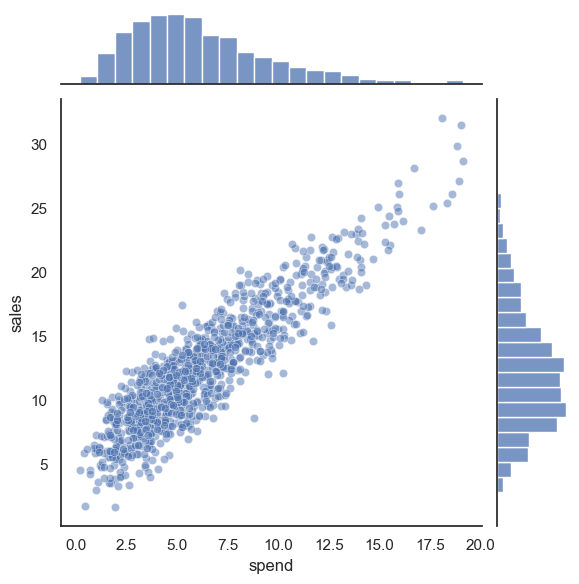

In [2]:
# Basic scatter + hist
sns.jointplot(data=df, x='spend', y='sales', alpha=0.5)
plt.show()


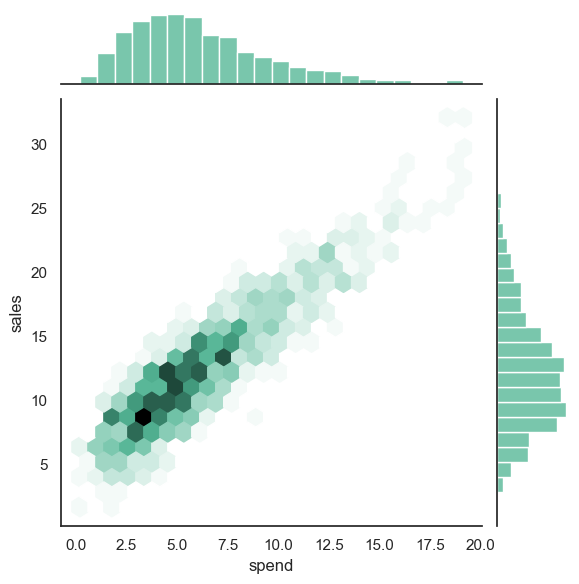

In [3]:
# Hexbin plot (great for dense data)
sns.jointplot(data=df, x='spend', y='sales', kind='hex', color='#4CB391')
plt.show()


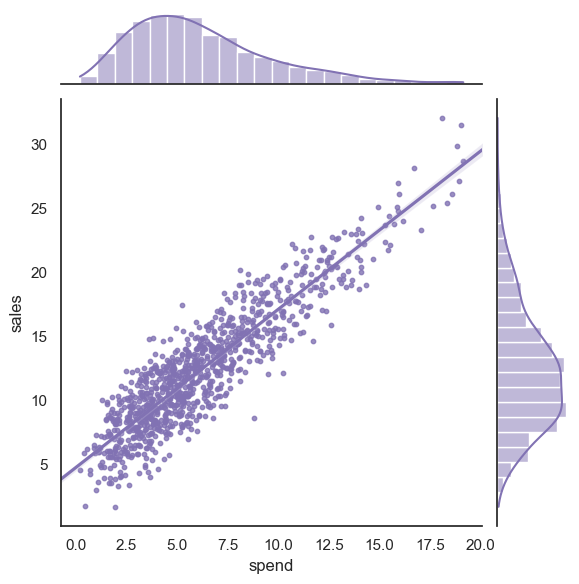

In [4]:
# Regression fit + KDE marginals
sns.jointplot(data=df, x='spend', y='sales', kind='reg', truncate=False, color='m', scatter_kws={'s': 10})
plt.show()


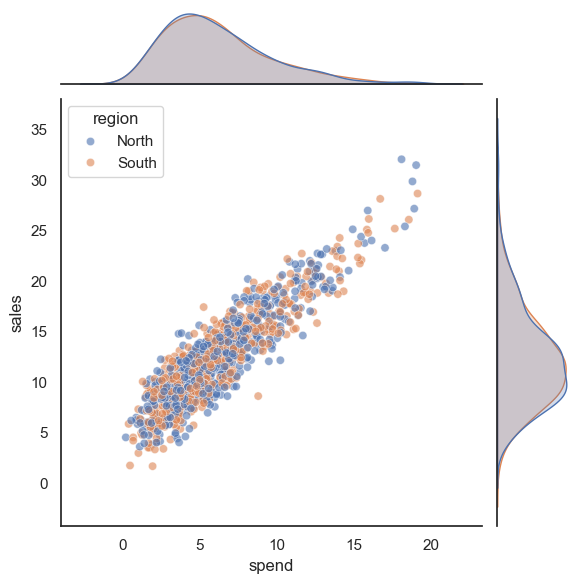

In [5]:
# Hue mapping (groups)
sns.jointplot(data=df, x='spend', y='sales', hue='region', alpha=0.6)
plt.show()


## 2) Customizing with `JointGrid`
When `jointplot` isn't enough (e.g., you want a scatter plot with a rug plot on margins, or boxplots on margins).

### Workflow
1. Initialize: `g = sns.JointGrid(...)`
2. Plot: `g.plot(joint_func, marginal_func)` OR `g.plot_joint(...)` + `g.plot_marginals(...)`


/opt/anaconda3/lib/python3.13/site-packages/seaborn/_base.py:1601: UserWarning: Horizontal orientation ignored with only `y` specified.
  warnings.warn(single_var_warning.format("Horizontal", "y"))


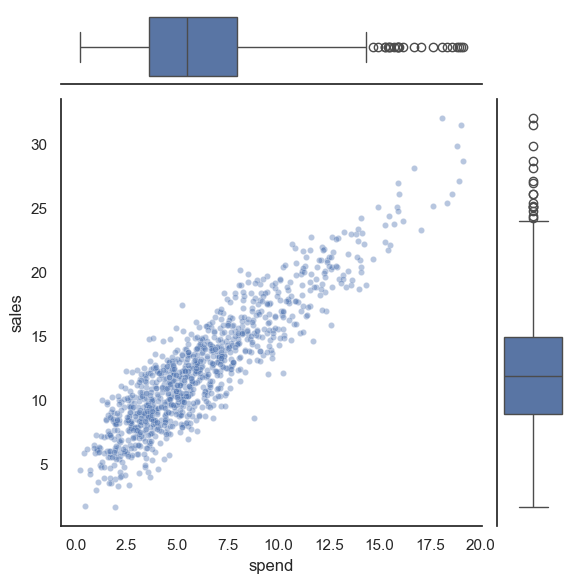

In [6]:
# Custom JointGrid: Scatter center + Boxplot margins
g = sns.JointGrid(data=df, x='spend', y='sales')
g.plot_joint(sns.scatterplot, alpha=0.4, s=20)
g.plot_marginals(sns.boxplot, orient='h') # orient handles axis alignment
plt.show()


## 3) Overlays (Advanced)
You can layer multiple plots on the joint axis.


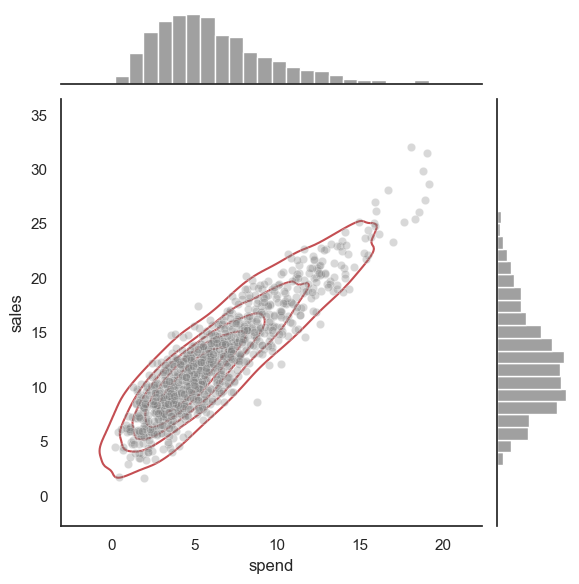

In [7]:
# Overlay: KDE contours on top of Scatter
g = sns.jointplot(data=df, x='spend', y='sales', kind='scatter', alpha=0.3, color='gray')
g.plot_joint(sns.kdeplot, color='r', zorder=0, levels=6)
plt.show()


## Practice Set
1. Create a `jointplot` with `kind='kde'` for `spend` vs `sales`.
2. Use `JointGrid` to create a plot with `regplot` in the center and `kdeplot` on the margins.


In [8]:
# Practice template
# ...
